In [ ]:
# Cell 1: Import necessary modules
import osm2streets_python
import geopandas as gpd
import json
import matplotlib.pyplot as plt

print("osm2streets_python imported successfully.")

## Running a single testcase

Loaded 1466704 bytes from ../tests/src/neukolln/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!


[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #95 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #121 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #132 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #148 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #153 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #154 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #168 got trimmed into oblivion, collapse it later
[2024-11-14T21:37:50Z ERROR osm2streets::operations::update_geometry] Road #169 got trimmed into oblivion, collapse it later
[

Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


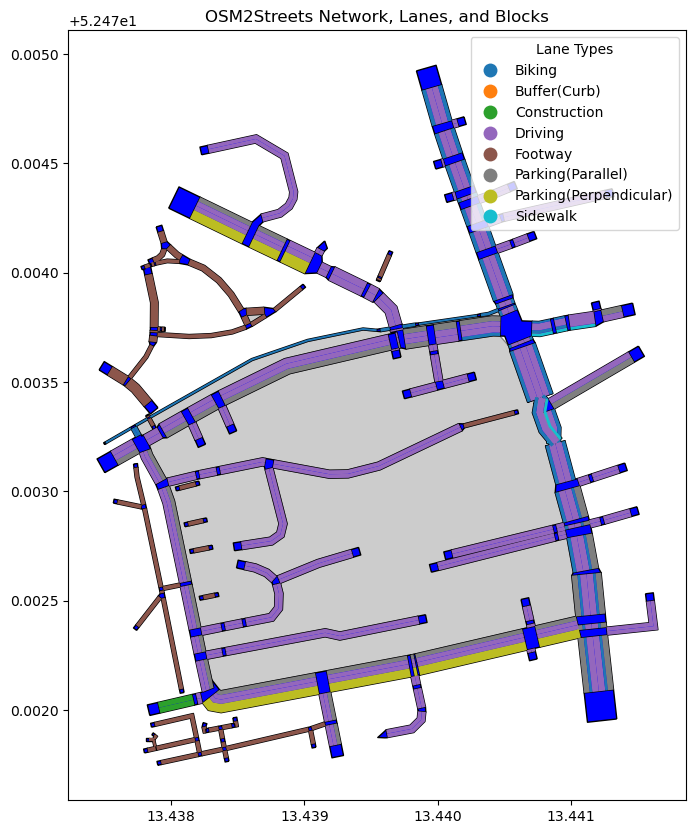

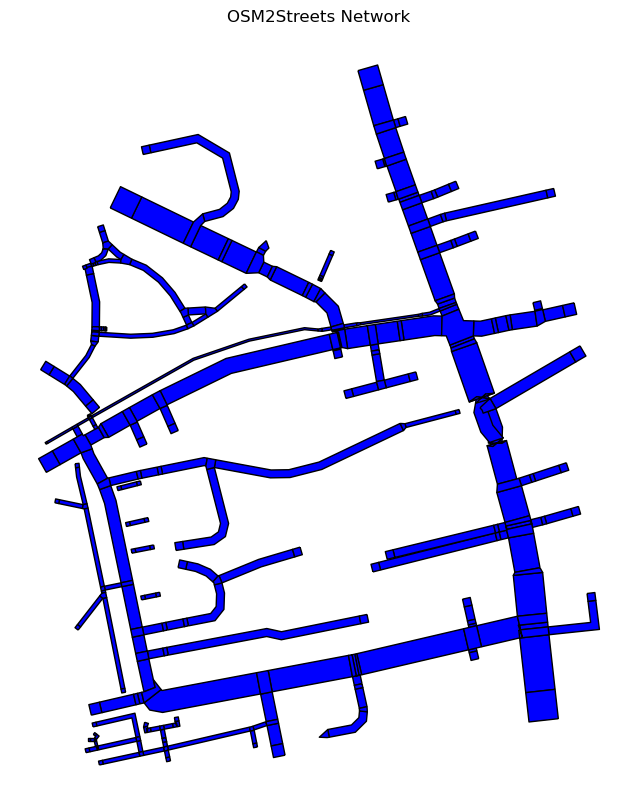

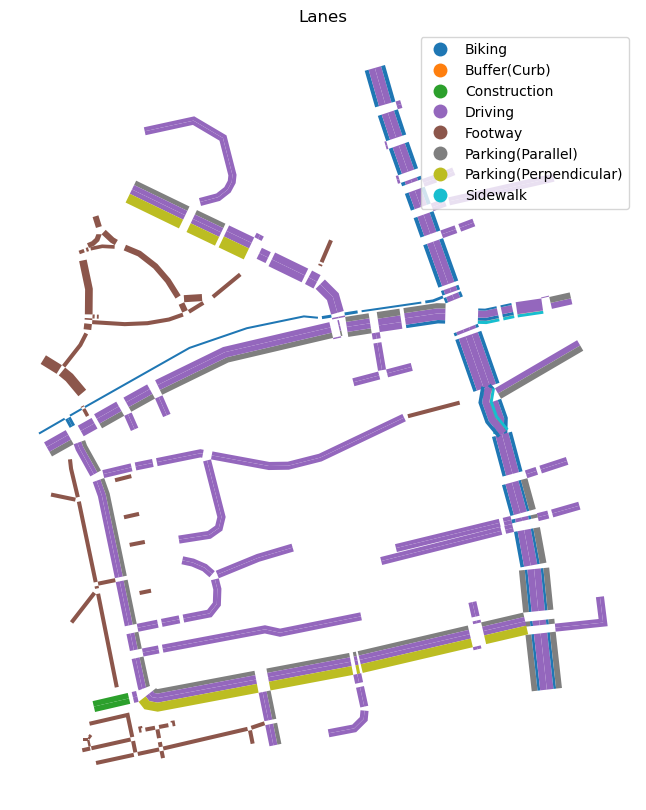

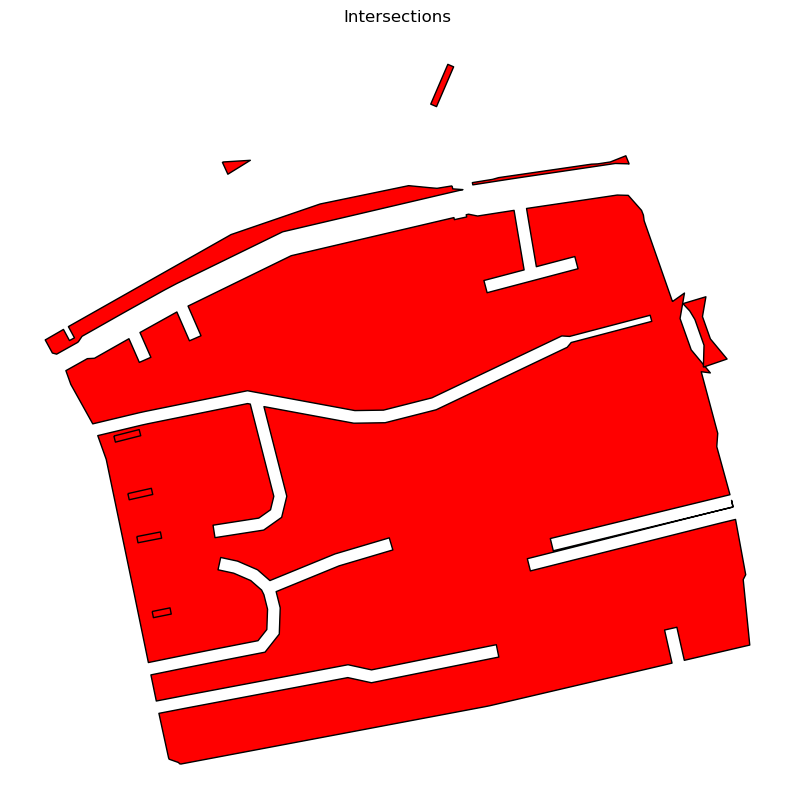

In [33]:
# Cell 2: Load OSM XML data as bytes
osm_file_path = "../tests/src/neukolln/input.osm"
with open(osm_file_path, "rb") as file:
    osm_input = file.read()
print(f"Loaded {len(osm_input)} bytes from {osm_file_path}.")

# Load the GeoJSON boundary for clipping
with open("../tests/src/neukolln/boundary.json", "r") as f:
    clip_pts_geojson = json.load(f)

# Convert the JSON object to a string format for input
clip_pts_geojson = json.dumps(clip_pts_geojson)

# Cell 3: Define input options for PyStreetNetwork
input_options = {
    "debug_each_step": False,
    "dual_carriageway_experiment": False,
    "sidepath_zipping_experiment": False,
    "inferred_sidewalks": True,
    "inferred_kerbs": True,
    "date_time": None,
    "override_driving_side": "Right"
}
input_options_json = json.dumps(input_options)

# Cell 4: Initialize PyStreetNetwork
try:
    network = osm2streets_python.PyStreetNetwork(osm_input, clip_pts_geojson, input_options_json)
    print("PyStreetNetwork instance created successfully!")
except Exception as e:
    print(f"Error during initialization: {e}")

# Cell 5: Generate and visualize the outputs
# Function to load geojson output and convert to GeoDataFrame
def load_geojson_to_gdf(geojson_str, crs=4326):
    geojson_data = json.loads(geojson_str)
    return gpd.GeoDataFrame.from_features(geojson_data["features"], crs=crs)

# Generate main network output
try:
    geojson_output = network.to_geojson_plain()
    gdf = load_geojson_to_gdf(geojson_output)
    print("GeoJSON output successfully generated!")
except Exception as e:
    print(f"Error generating main network GeoJSON: {e}")

# Generate lane polygons output
try:
    geojson_lane_output = network.to_lane_polygons_geojson()
    gdf_lanes = load_geojson_to_gdf(geojson_lane_output)
    print("Lane GeoJSON output successfully generated!")
except Exception as e:
    print(f"Error generating lane polygons GeoJSON: {e}")

# Cell 6: Find all blocks using find_all_blocks function and visualize output

# Attempt to find all blocks using sidewalks as an option (set to True/False as needed)
try:
    # Call find_all_blocks with sidewalks=True to include sidewalks in the block generation
    blocks_json = network.find_all_blocks(sidewalks=False)
    print("Block data successfully generated!")

    # Parse the JSON output from find_all_blocks
    blocks_data = json.loads(blocks_json)

    # Convert the blocks data to a GeoDataFrame for visualization
    gdf_blocks = gpd.GeoDataFrame.from_features(blocks_data["features"], crs=4326)
    print("Block data loaded into GeoDataFrame!")
except Exception as e:
    print(f"Error finding or visualizing blocks: {e}")

# Cell 7: Visualize the outputs with Matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_blocks.plot(ax=ax, color='grey', edgecolor='black', alpha=0.4)
gdf.plot(ax=ax, color='blue', edgecolor='k', label='Network')
gdf_lanes.plot(ax=ax, column="type", label='Lanes', legend=True, legend_kwds={'title': "Lane Types"})
plt.title("OSM2Streets Network, Lanes, and Blocks")

# Plot 1: Network Map
fig1, ax1 = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax1, color='blue', edgecolor='k')
ax1.set_title("OSM2Streets Network")
ax1.set_axis_off()  # Hide axes for cleaner presentation

# Plot 2: Lanes Map (by "type" if available in data)
fig2, ax2 = plt.subplots(figsize=(10, 10))
gdf_lanes.plot(ax=ax2, column="type", legend=True)  # Color by 'type' if this attribute exists
ax2.set_title("Lanes")
ax2.set_axis_off()

# Plot 3: Intersections Map
fig3, ax3 = plt.subplots(figsize=(10, 10))
gdf_blocks.plot(ax=ax3, color='red', edgecolor='k')
ax3.set_title("Intersections")
ax3.set_axis_off()


plt.show()

## Iterate through all testcases

osm2streets_python imported successfully.
Subfolders: ['frederiksted', 'kingsway_junction', 'degenerate_bug', 'service_road_loop', 'cycleway_rejoin_road', 'seattle_triangle', 'roosevelt_cycletrack', 'aurora_sausage_link', 'perth_peanut_roundabout', 'arizona_highways', 'montlake_roundabout', 'oneway_loop', 'seattle_slip_lane', 'leeds_cycleway', 'taipei', 'fremantle_placement', 'st_georges_cycletrack', 'northgate_dual_carriageway', 'tempe_split', 'tiny_loop', 'i5_exit_ramp', 'neukolln', 'overlapping_service_roads', 'quad_intersection', 'perth_stretched_lights', 'bristol_sausage_links', 'tiny_roundabout', 'tempe_light_rail', 'borough_sausage_links', 'bristol_contraflow_cycleway']
Error during initialization: frederiksted
Loaded 556231 bytes from ../tests/src/kingsway_junction/input.osm.


[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #2 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #81 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #19 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #83 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #82 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #20 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #101 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:10Z ERROR osm2streets::operations::update_geometry] Road #81 got trimmed into oblivion, collapse it later
[2024-11

PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


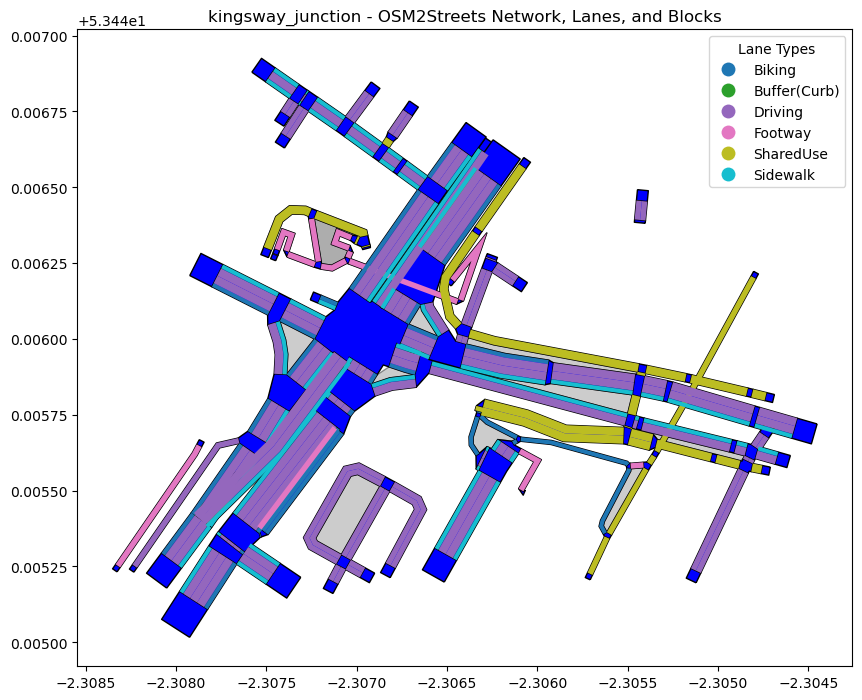

Loaded 164391 bytes from ../tests/src/degenerate_bug/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:11Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #6) called with no roads
[2024-11-14T21:36:11Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #7) called with no roads
[2024-11-14T21:36:11Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #8) called with no roads
[2024-11-14T21:36:11Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #12) called with no roads
[2024-11-14T21:36:11Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #13) called with no roads


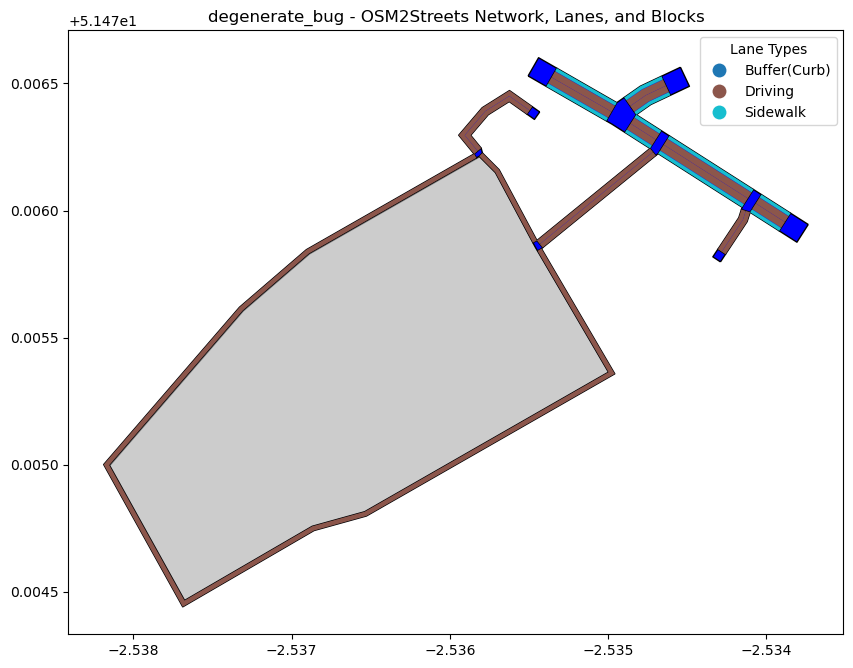

Loaded 75254 bytes from ../tests/src/service_road_loop/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


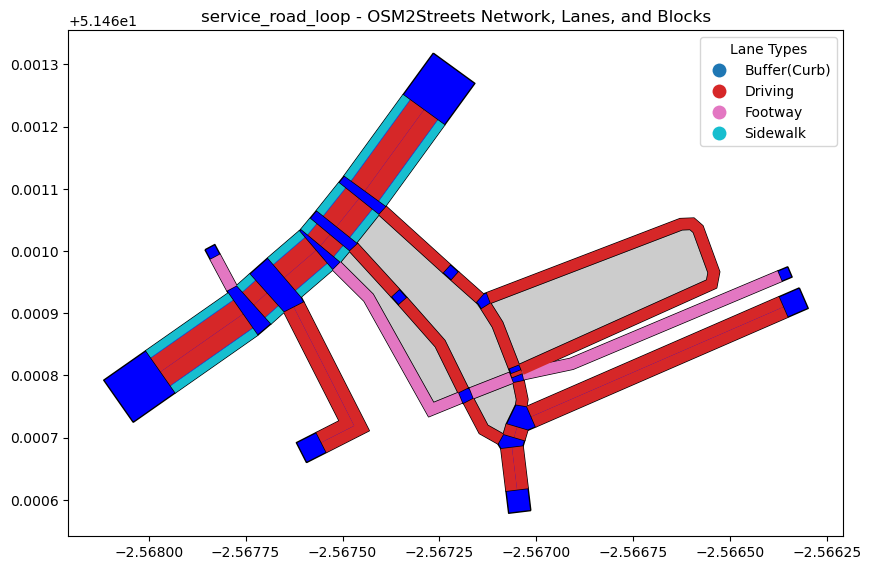

Loaded 299954 bytes from ../tests/src/cycleway_rejoin_road/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:11Z ERROR osm2streets::operations::update_geometry] Road #34 got trimmed into oblivion, collapse it later


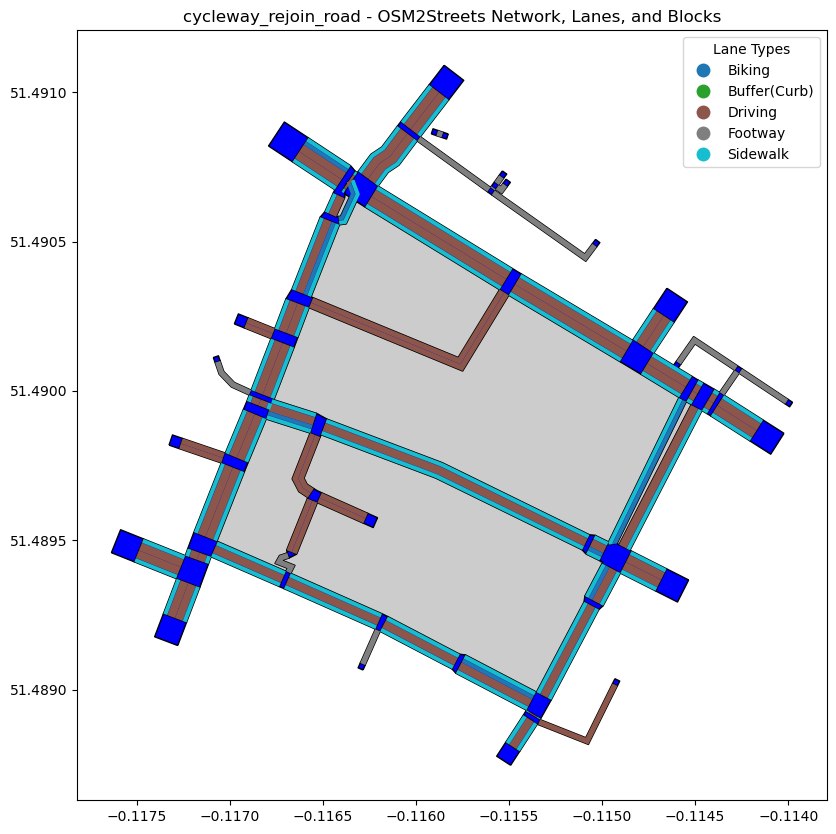

Loaded 211464 bytes from ../tests/src/seattle_triangle/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


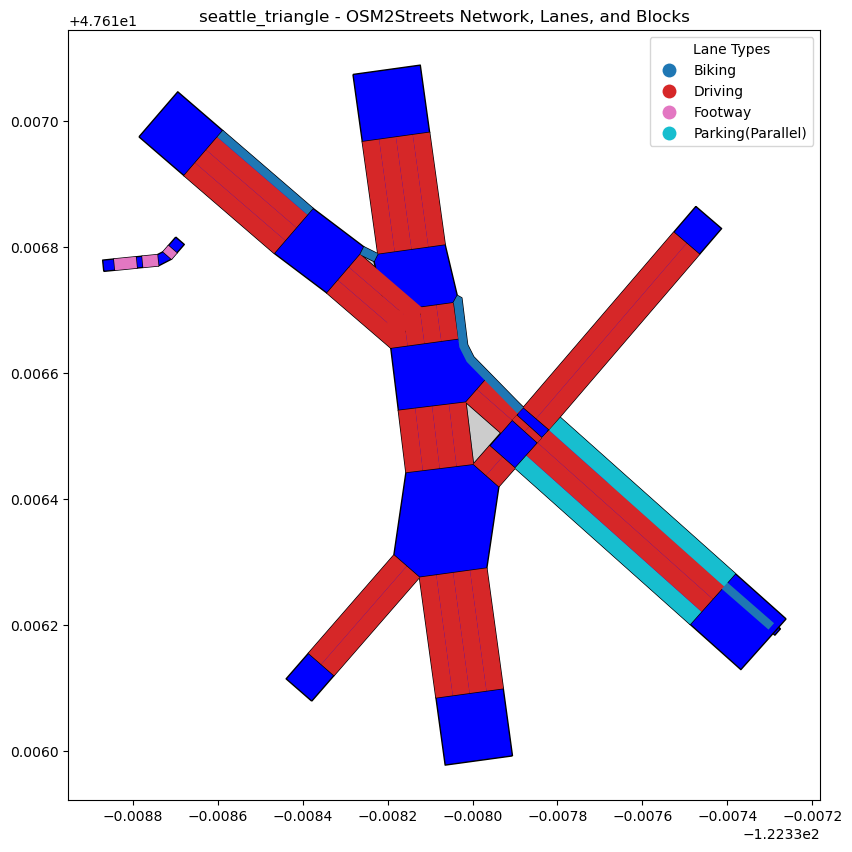

Loaded 1128322 bytes from ../tests/src/roosevelt_cycletrack/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:12Z ERROR streets_reader::split_ways] Skipping Road #35: PL with total length 42.4448m and 5 pts has dupe non-adjacent pts
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #98 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #32 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #142 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #69) called with no roads
[2024-11-14T21:36:12Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #70) called with no roads
[2024-11-14T21:36:12Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #69) called with no roads
[2024-11-14T21:36:12Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #26) called with no roads
[2024-11-14T21:36:

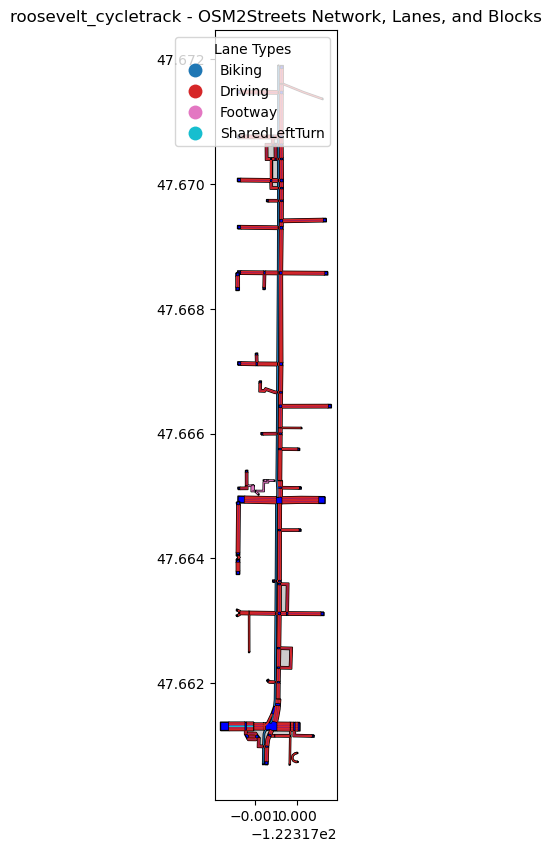

Loaded 316493 bytes from ../tests/src/aurora_sausage_link/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


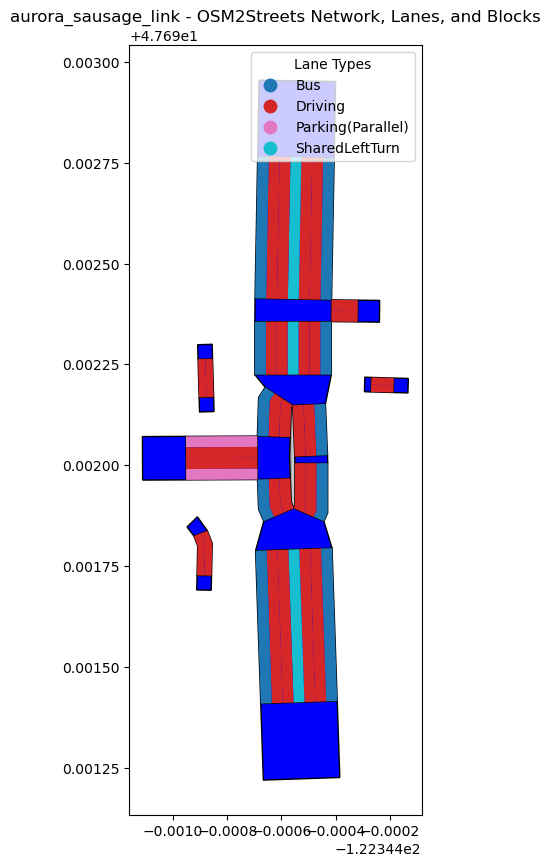

Loaded 285448 bytes from ../tests/src/perth_peanut_roundabout/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #13 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #12 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #0 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #45 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #50 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #53 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #44 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:12Z ERROR osm2streets::operations::update_geometry] Road #44 got trimmed into oblivion, collapse it later
[2024-11-

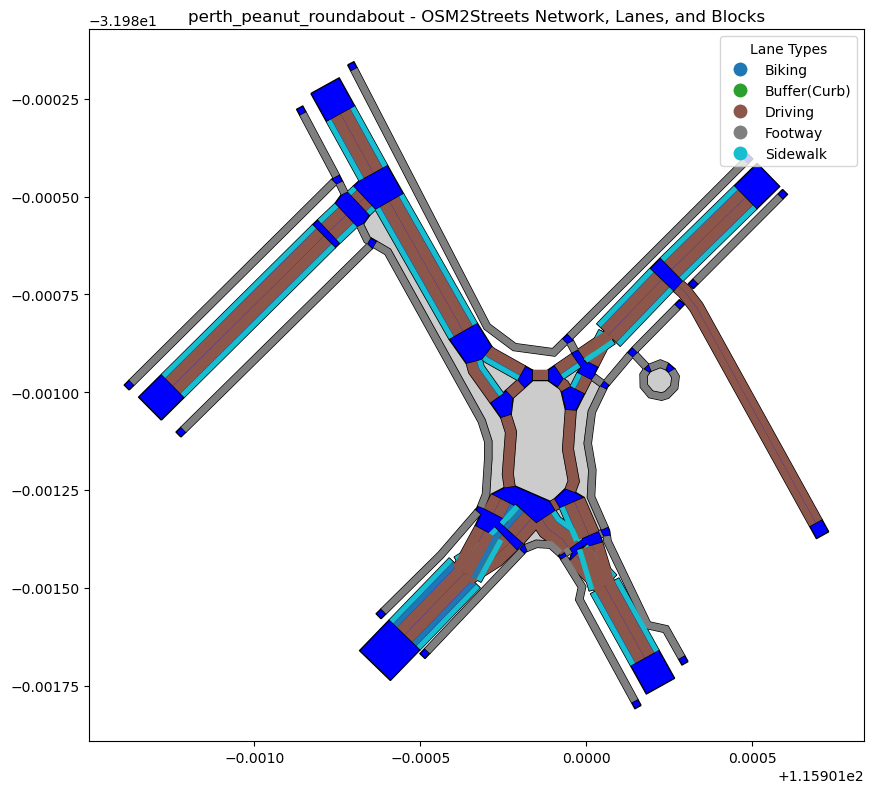

Loaded 486169 bytes from ../tests/src/arizona_highways/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #21 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #30 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #31 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #41 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #32 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:13Z ERROR osm2streets::operations::update_geometry] Road #40 got trimmed into oblivion, collapse it later


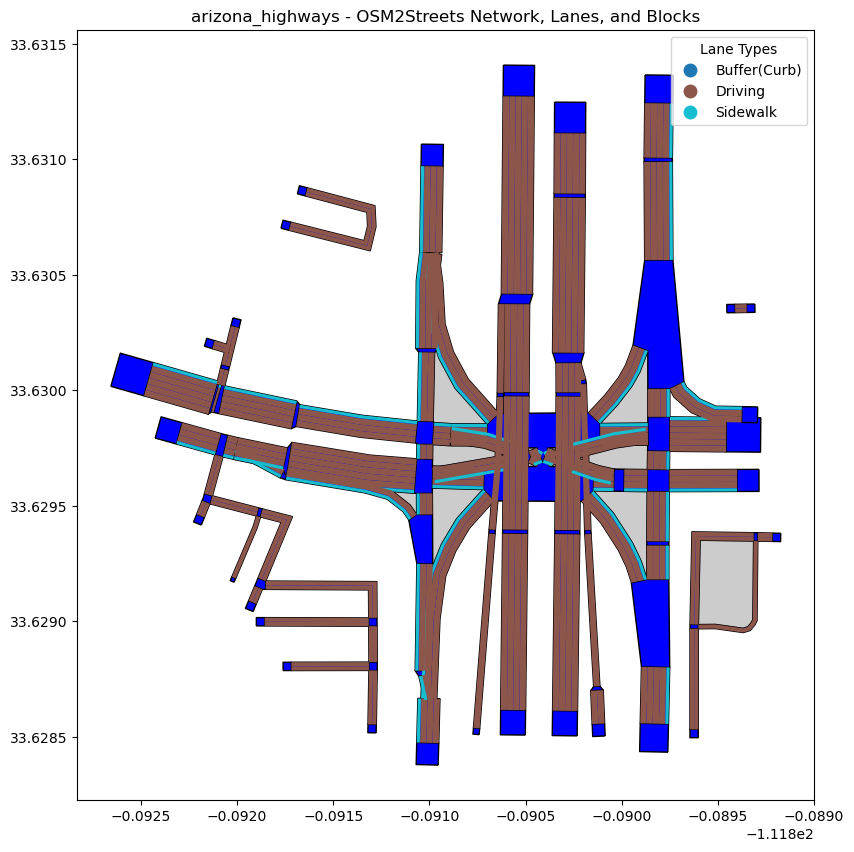

Loaded 133449 bytes from ../tests/src/montlake_roundabout/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:13Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #12) called with no roads


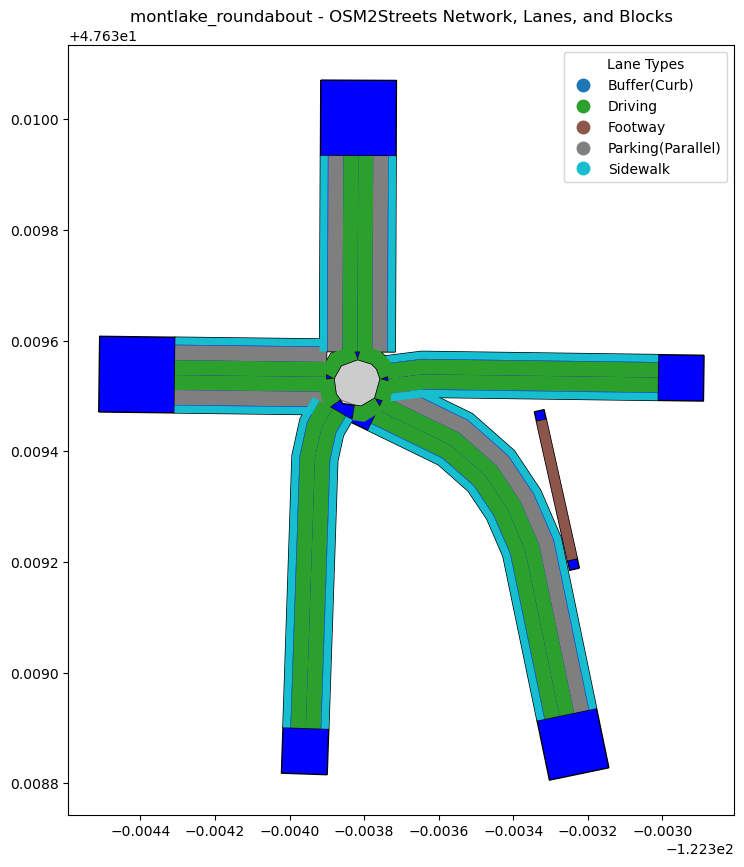

Loaded 321732 bytes from ../tests/src/oneway_loop/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:14Z ERROR osm2streets::operations::update_geometry] Road #31 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #11) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #44) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #45) called with no roads


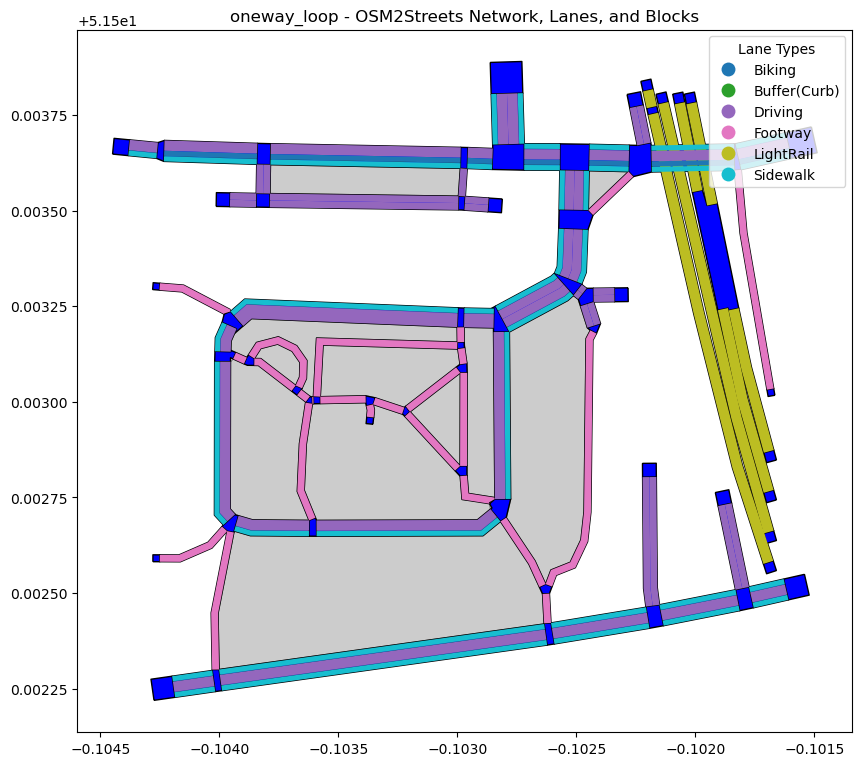

Loaded 551530 bytes from ../tests/src/seattle_slip_lane/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:14Z ERROR osm2streets::operations::update_geometry] Road #65 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #6) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #7) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #8) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #10) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #11) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #13) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #14) called with no roads
[2024-11-14T21:36:14Z ERROR osm2streets::geometry] Hack! int

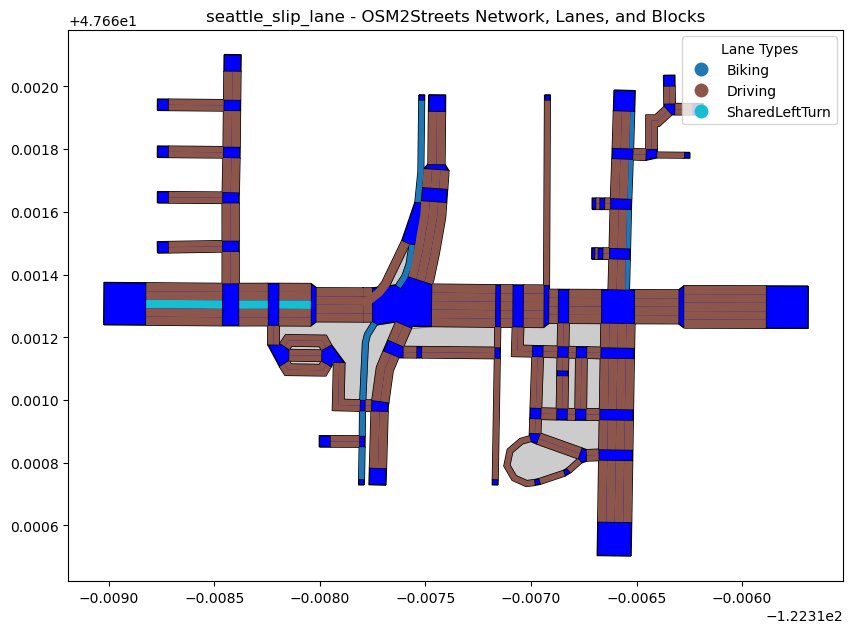

Loaded 3002617 bytes from ../tests/src/leeds_cycleway/input.osm.


[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Road #10 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Road #448 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Road #95 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Road #138 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Can't make intersection geometry for Intersection #137: Ring has repeat non-adjacent points near Pt2D(82.0911, 354.5954)
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Can't make intersection geometry for Intersection #143: Ring has repeat non-adjacent points near Pt2D(82.0386, 365.5481)
[2024-11-14T21:36:15Z ERROR osm2streets::operations::update_geometry] Can't make intersection geometry for Intersection 

PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


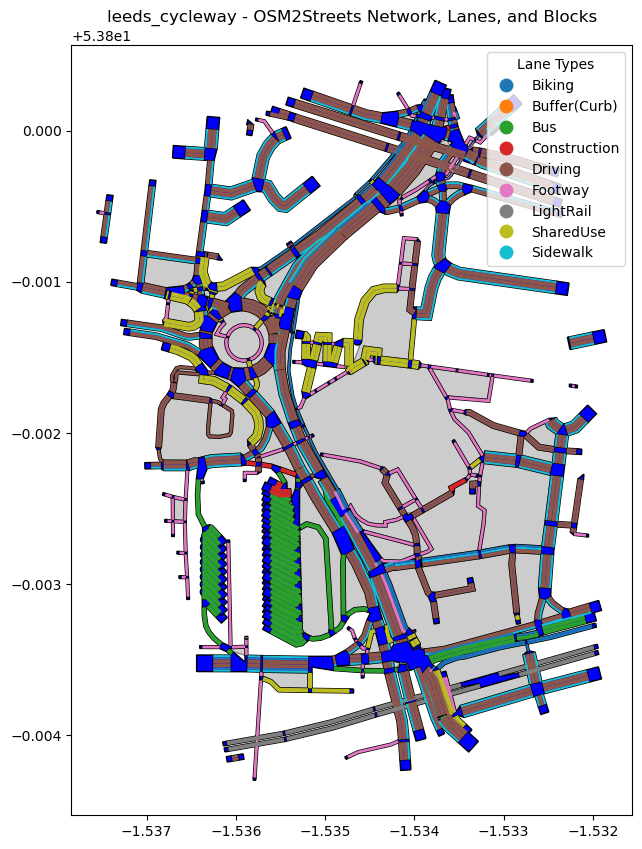

Loaded 1330911 bytes from ../tests/src/taipei/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #22 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #39 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #26 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #42 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #5 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #41 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #38 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:16Z ERROR osm2streets::operations::update_geometry] Road #49 got trimmed into oblivion, collapse it later
[2024-11-

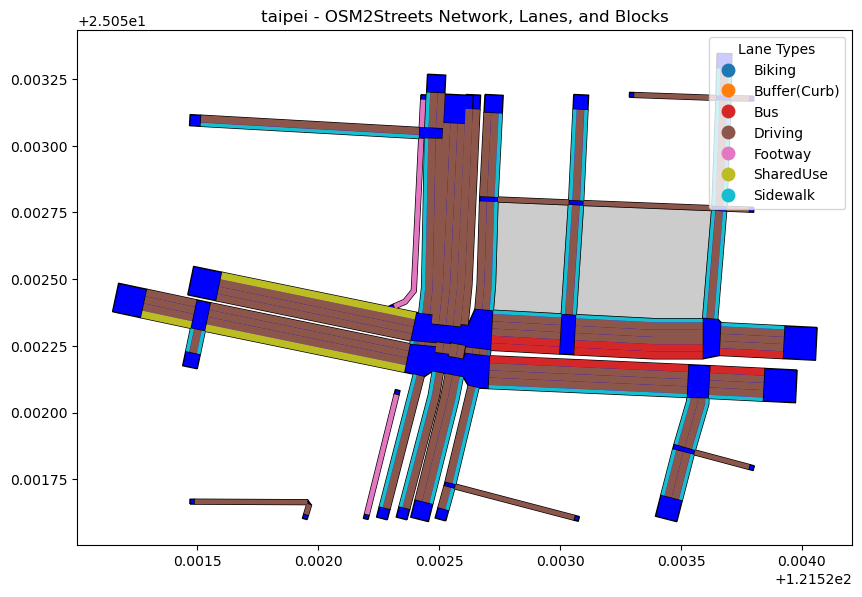

Loaded 142862 bytes from ../tests/src/fremantle_placement/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #13 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #17) called with no roads


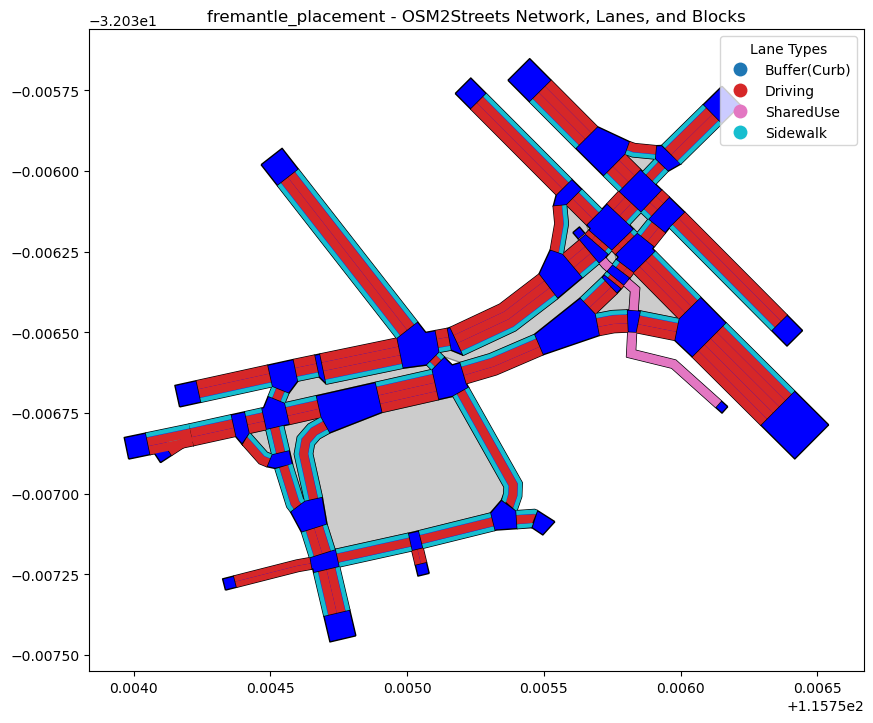

Loaded 2582559 bytes from ../tests/src/st_georges_cycletrack/input.osm.
PyStreetNetwork instance created successfully!


[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #0 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #43 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #248 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #10 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #28 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #30 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Road #120 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:17Z ERROR osm2streets::operations::update_geometry] Can't make intersection geometry for Intersection #159: Road 

GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


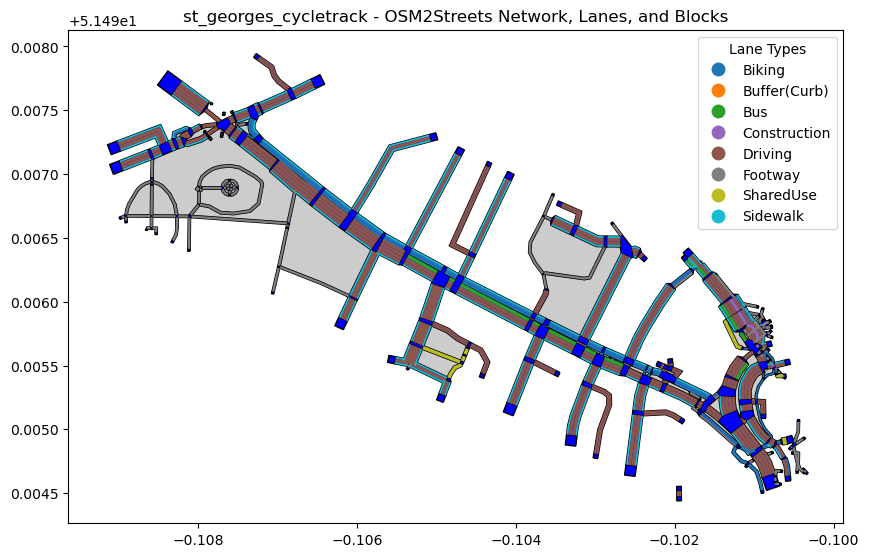

Loaded 709927 bytes from ../tests/src/northgate_dual_carriageway/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!


[2024-11-14T21:36:18Z ERROR osm2streets::operations::update_geometry] Road #177 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:18Z ERROR osm2streets::operations::update_geometry] Road #102 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:18Z ERROR osm2streets::operations::update_geometry] Can't make intersection geometry for Intersection #207: Road is too short to trim for a degenerate intersection
[2024-11-14T21:36:18Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #6) called with no roads
[2024-11-14T21:36:18Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #16) called with no roads
[2024-11-14T21:36:18Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #91) called with no roads
[2024-11-14T21:36:18Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #94) called with no roads
[2024-11-14T21:36:18Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #104) call

Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


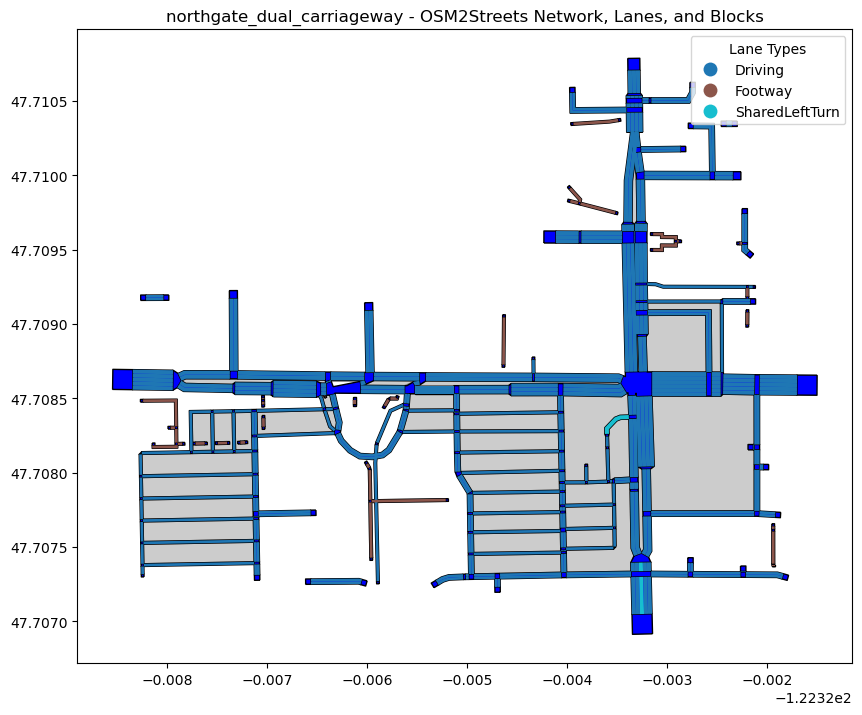

Loaded 709738 bytes from ../tests/src/tempe_split/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:19Z ERROR osm2streets::operations::update_geometry] Road #14 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:19Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #16) called with no roads
[2024-11-14T21:36:19Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #17) called with no roads


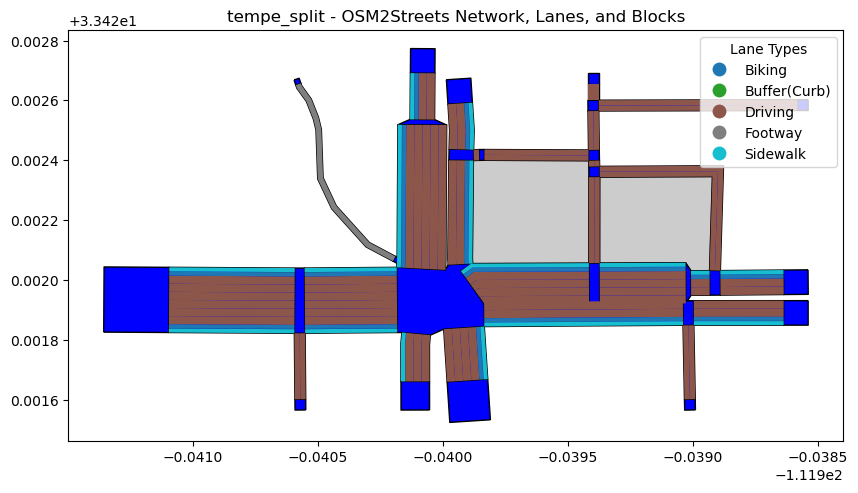

Loaded 468556 bytes from ../tests/src/tiny_loop/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:19Z ERROR streets_reader::split_ways] Skipping Road #23: PL with total length 89.5325m and 9 pts has dupe non-adjacent pts
[2024-11-14T21:36:19Z ERROR osm2streets::operations::update_geometry] Road #8 got trimmed into oblivion, collapse it later


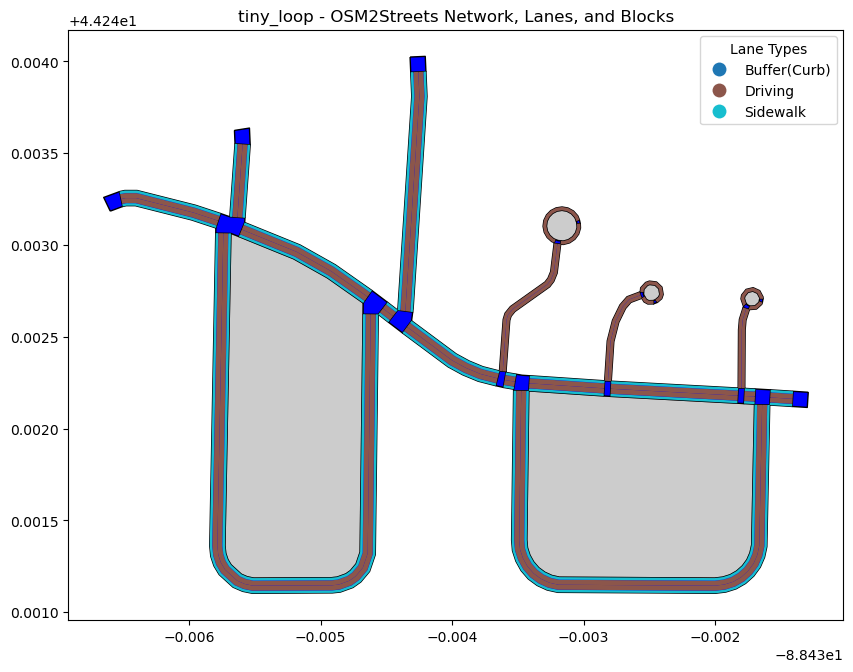

Loaded 901603 bytes from ../tests/src/i5_exit_ramp/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:19Z ERROR osm2streets::operations::update_geometry] Road #33 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:19Z ERROR osm2streets::operations::update_geometry] Road #70 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:19Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #97) called with no roads
[2024-11-14T21:36:19Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #99) called with no roads
[2024-11-14T21:36:19Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #98) called with no roads


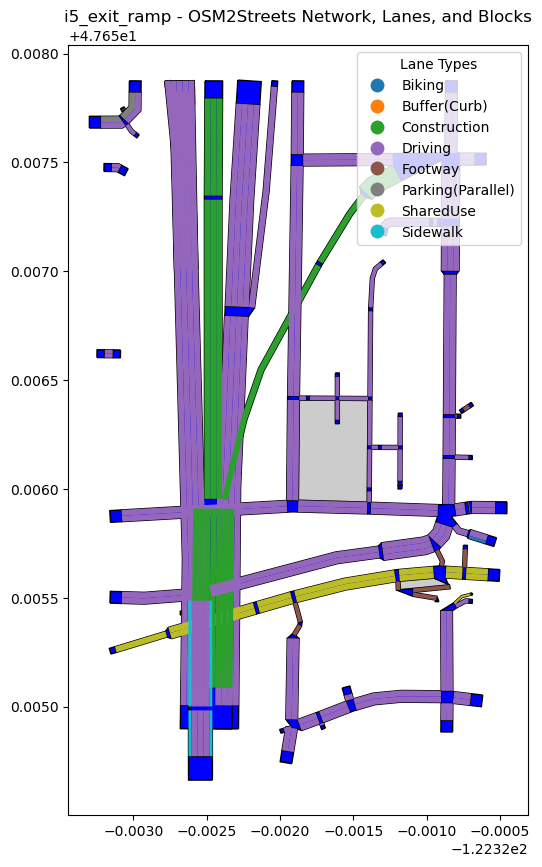

Loaded 1466704 bytes from ../tests/src/neukolln/input.osm.


[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #95 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #121 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #132 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #148 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #153 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #154 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #168 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #169 got trimmed into oblivion, collapse it later
[

PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


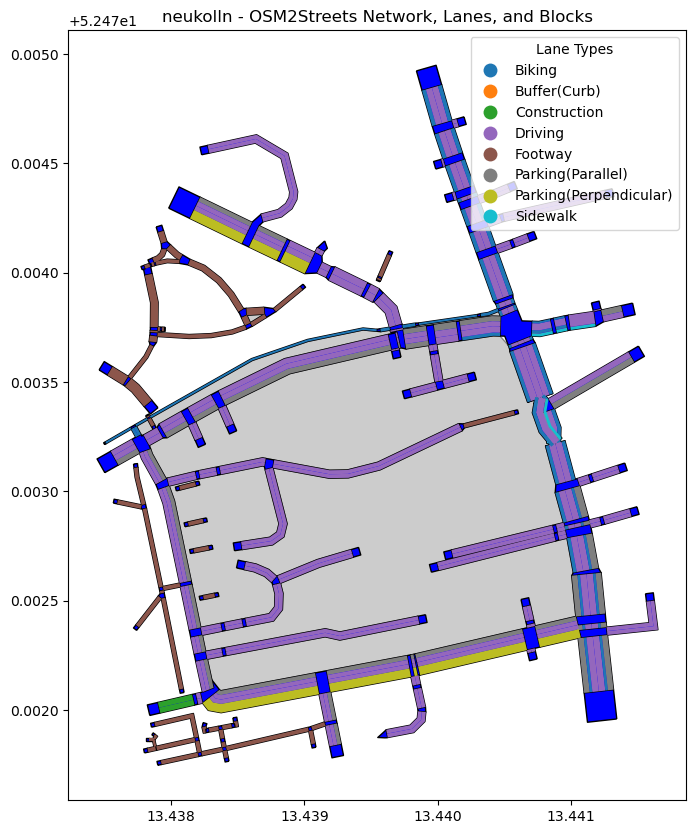

Loaded 54390 bytes from ../tests/src/overlapping_service_roads/input.osm.
PyStreetNetwork instance created successfully!
intersection() between two PolyLines that're exactly the same
intersection() between two PolyLines that're exactly the same
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #8 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #10 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #12 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #14 got trimmed into oblivion, collapse it later


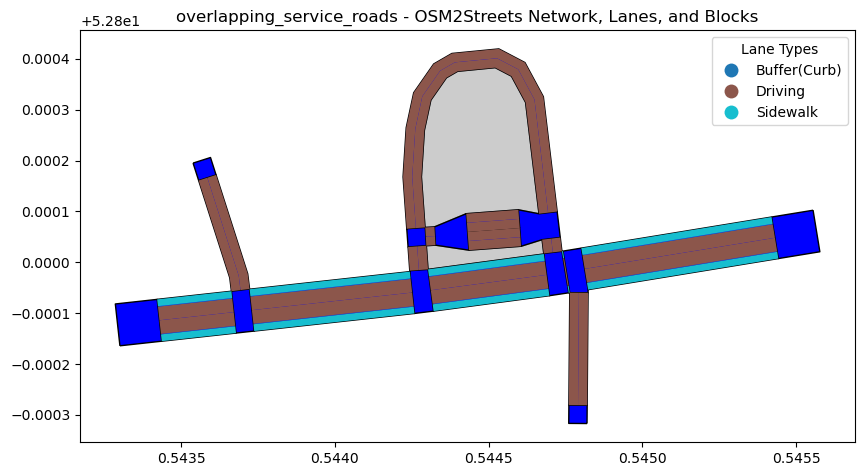

Loaded 896407 bytes from ../tests/src/quad_intersection/input.osm.


[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #11 got trimmed into oblivion, collapse it later


PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #14 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #31 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #32 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::operations::update_geometry] Road #47 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:20Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #37) called with no roads
[2024-11-14T21:36:20Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #40) called with no roads
[2024-11-14T21:36:20Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #55) called with no roads
[2024-11-14T21:36:20Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #28) called with no roads
[2024-11-14T21:36:20Z ERROR osm2stre

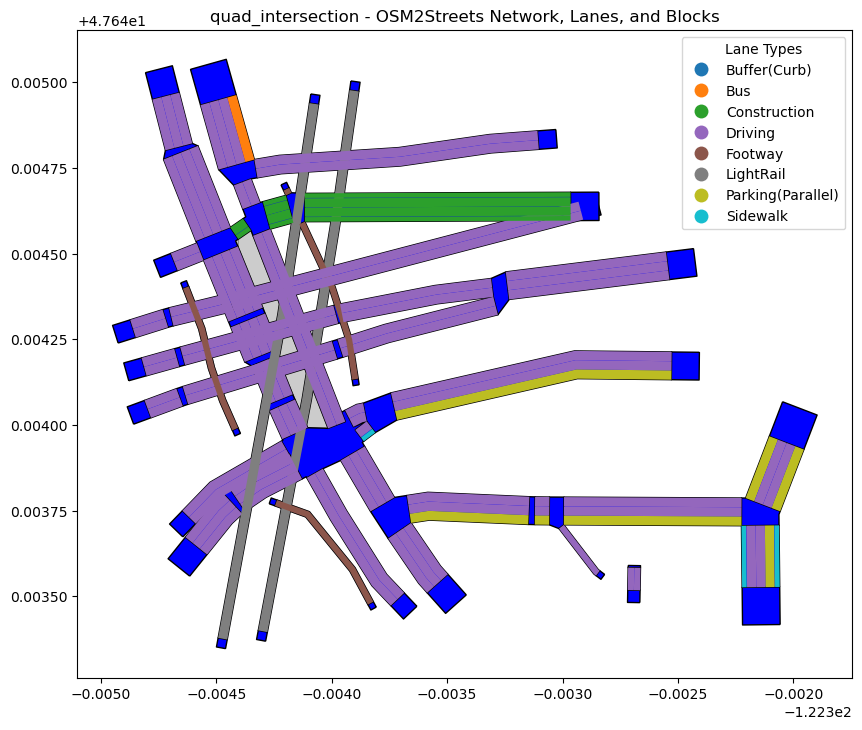

Loaded 110945 bytes from ../tests/src/perth_stretched_lights/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #5 got trimmed into oblivion, collapse it later


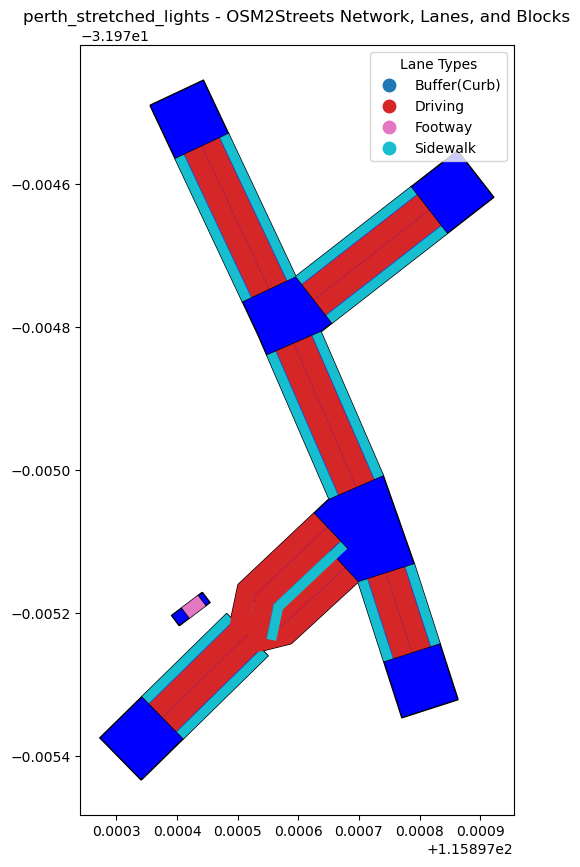

Loaded 234079 bytes from ../tests/src/bristol_sausage_links/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #30 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #29 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #27 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #18 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #28 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:21Z ERROR osm2streets::operations::update_geometry] Road #28 got trimmed into oblivion, collapse it later


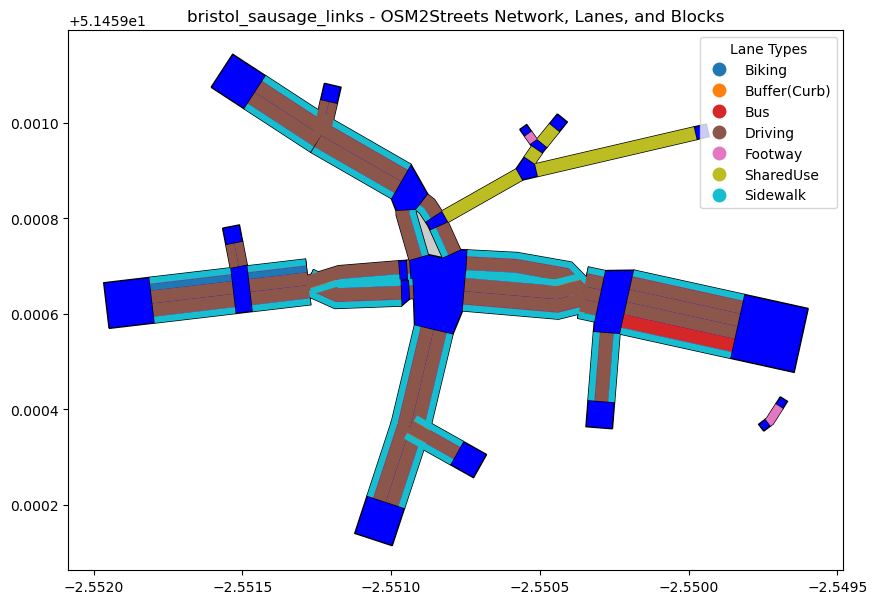

Loaded 32663 bytes from ../tests/src/tiny_roundabout/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


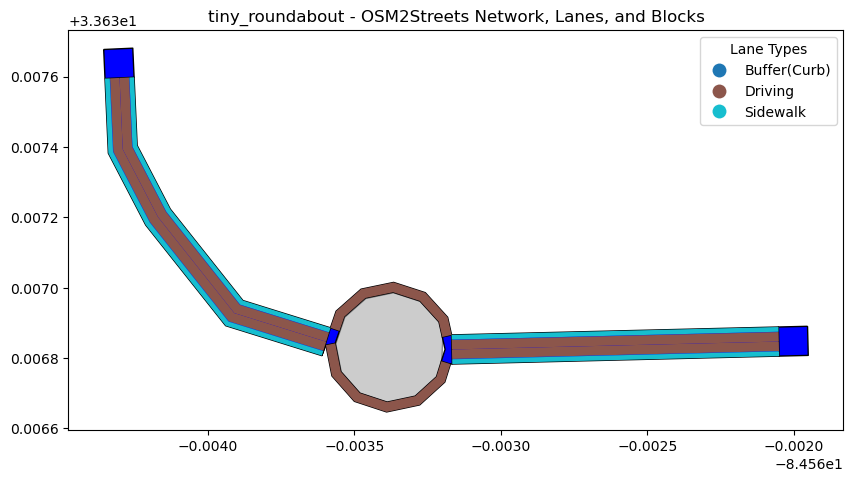

Loaded 462081 bytes from ../tests/src/tempe_light_rail/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:22Z ERROR streets_reader::split_ways] Skipping Road #36: PL with total length 92.0084m and 6 pts has dupe non-adjacent pts
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #11) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #34 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #25) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #24) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #28) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #27) called with no roads


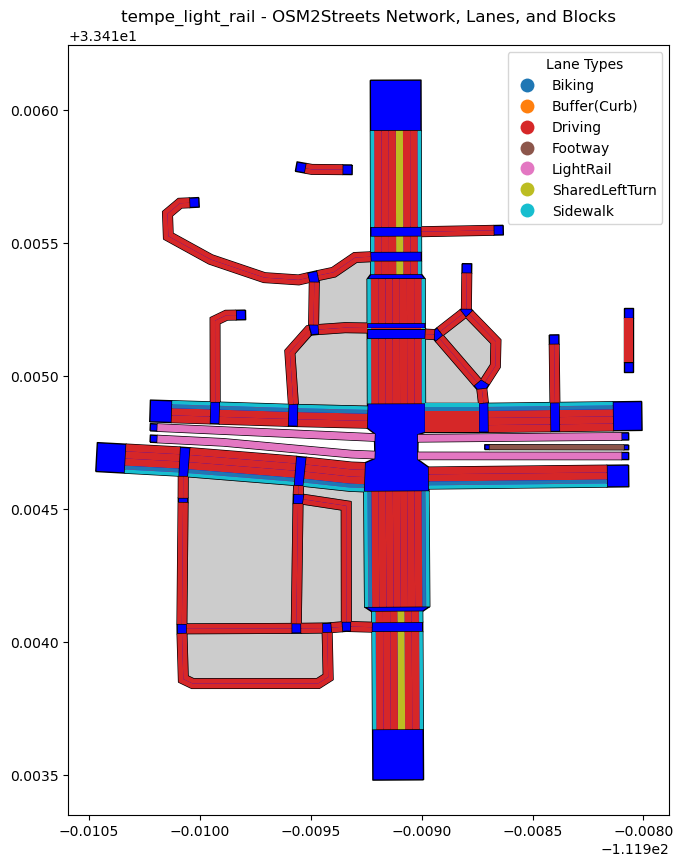

Loaded 660216 bytes from ../tests/src/borough_sausage_links/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #13 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #75 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #5 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #6) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #22) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #40 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::geometry] Hack! intersection_polygon(Intersection #45) called with no roads
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #67 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm

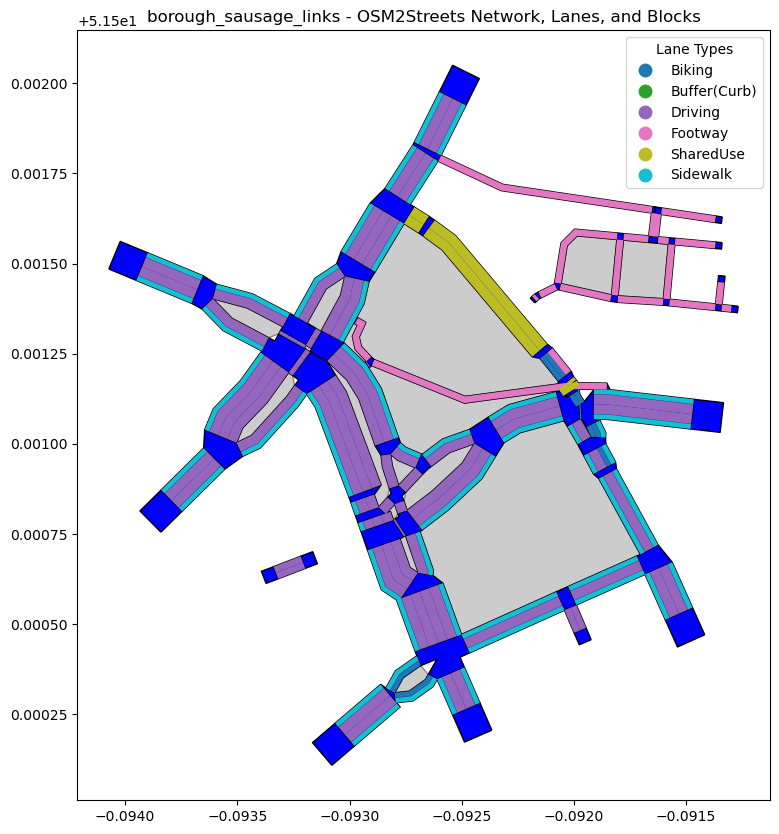

Loaded 242213 bytes from ../tests/src/bristol_contraflow_cycleway/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!
Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #15 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #4 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #10 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #19 got trimmed into oblivion, collapse it later
[2024-11-14T21:36:22Z ERROR osm2streets::operations::update_geometry] Road #2 got trimmed into oblivion, collapse it later


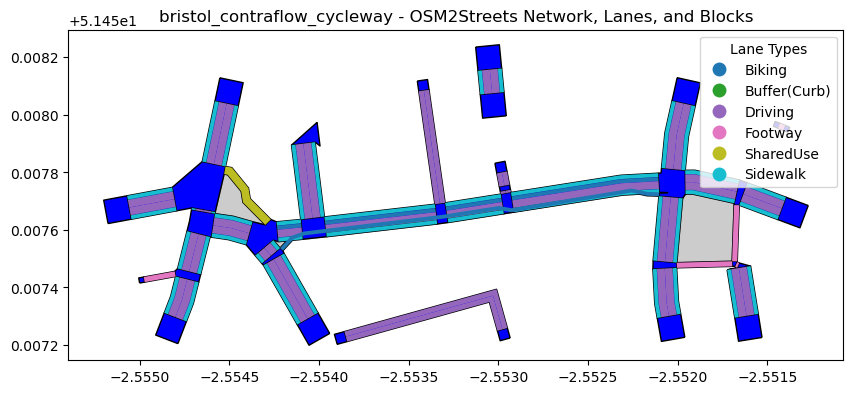

In [30]:
# Cell 1: Import necessary modules
import osm2streets_python
import geopandas as gpd
import json
import matplotlib.pyplot as plt

print("osm2streets_python imported successfully.")

import os

# Specify the path to the folder
folder_path = "../tests/src"

# List to store subfolder names
subfolders = []

# Loop through entries in the folder
for entry in os.listdir(folder_path):
    # Construct the full path
    full_path = os.path.join(folder_path, entry)
    # Check if the entry is a folder
    if os.path.isdir(full_path):
        subfolders.append(entry)

print("Subfolders:", subfolders)

for testcase in subfolders:
    try: 
        # Cell 2: Load OSM XML data as bytes
        osm_file_path = f"../tests/src/{testcase}/input.osm"
        with open(osm_file_path, "rb") as file:
            osm_input = file.read()
        print(f"Loaded {len(osm_input)} bytes from {osm_file_path}.")

        # Load the GeoJSON boundary for clipping
        with open(f"../tests/src/{testcase}/boundary.json", "r") as f:
            clip_pts_geojson = json.load(f)

        # Convert the JSON object to a string format for input
        clip_pts_geojson = json.dumps(clip_pts_geojson)

        # Cell 3: Define input options for PyStreetNetwork
        input_options = {
            "debug_each_step": False,
            "dual_carriageway_experiment": False,
            "sidepath_zipping_experiment": False,
            "inferred_sidewalks": True,
            "inferred_kerbs": True,
            "date_time": None,
            "override_driving_side": "Right"
        }
        input_options_json = json.dumps(input_options)

        # Cell 4: Initialize PyStreetNetwork
        try:
            network = osm2streets_python.PyStreetNetwork(osm_input, clip_pts_geojson, input_options_json)
            print("PyStreetNetwork instance created successfully!")
        except Exception as e:
            print(f"Error during initialization: {e}")

        # Cell 5: Generate and visualize the outputs
        # Function to load geojson output and convert to GeoDataFrame
        def load_geojson_to_gdf(geojson_str, crs=4326):
            geojson_data = json.loads(geojson_str)
            return gpd.GeoDataFrame.from_features(geojson_data["features"], crs=crs)

        # Generate main network output
        try:
            geojson_output = network.to_geojson_plain()
            gdf = load_geojson_to_gdf(geojson_output)
            print("GeoJSON output successfully generated!")
        except Exception as e:
            print(f"Error generating main network GeoJSON: {e}")

        # Generate lane polygons output
        try:
            geojson_lane_output = network.to_lane_polygons_geojson()
            gdf_lanes = load_geojson_to_gdf(geojson_lane_output)
            print("Lane GeoJSON output successfully generated!")
        except Exception as e:
            print(f"Error generating lane polygons GeoJSON: {e}")

        # Cell 6: Find all blocks using find_all_blocks function and visualize output

        # Attempt to find all blocks using sidewalks as an option (set to True/False as needed)
        try:
            # Call find_all_blocks with sidewalks=True to include sidewalks in the block generation
            blocks_json = network.find_all_blocks(sidewalks=False)
            print("Block data successfully generated!")

            # Parse the JSON output from find_all_blocks
            blocks_data = json.loads(blocks_json)

            # Convert the blocks data to a GeoDataFrame for visualization
            gdf_blocks = gpd.GeoDataFrame.from_features(blocks_data["features"], crs=4326)
            print("Block data loaded into GeoDataFrame!")
        except Exception as e:
            print(f"Error finding or visualizing blocks: {e}")

        # Cell 7: Visualize the outputs with Matplotlib

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        gdf_blocks.plot(ax=ax, color='grey', edgecolor='black', alpha=0.4)
        gdf.plot(ax=ax, color='blue', edgecolor='k', label='Network')
        gdf_lanes.plot(ax=ax, column="type", label='Lanes', legend=True, legend_kwds={'title': "Lane Types"})
        plt.title(f"{testcase} - OSM2Streets Network, Lanes, and Blocks")
        plt.show()
    except Exception as e:
        print(f"Error during initialization: {testcase}")

    

osm2streets_python imported successfully.
Loaded 1466704 bytes from ../tests/src/neukolln/input.osm.
PyStreetNetwork instance created successfully!
GeoJSON output successfully generated!


[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #95 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #121 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #132 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #148 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #153 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #154 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #168 got trimmed into oblivion, collapse it later
[2024-11-14T21:26:40Z ERROR osm2streets::operations::update_geometry] Road #169 got trimmed into oblivion, collapse it later
[

Lane GeoJSON output successfully generated!
Block data successfully generated!
Block data loaded into GeoDataFrame!


/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_94712/1837557920.py:86: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_94712/1837557920.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


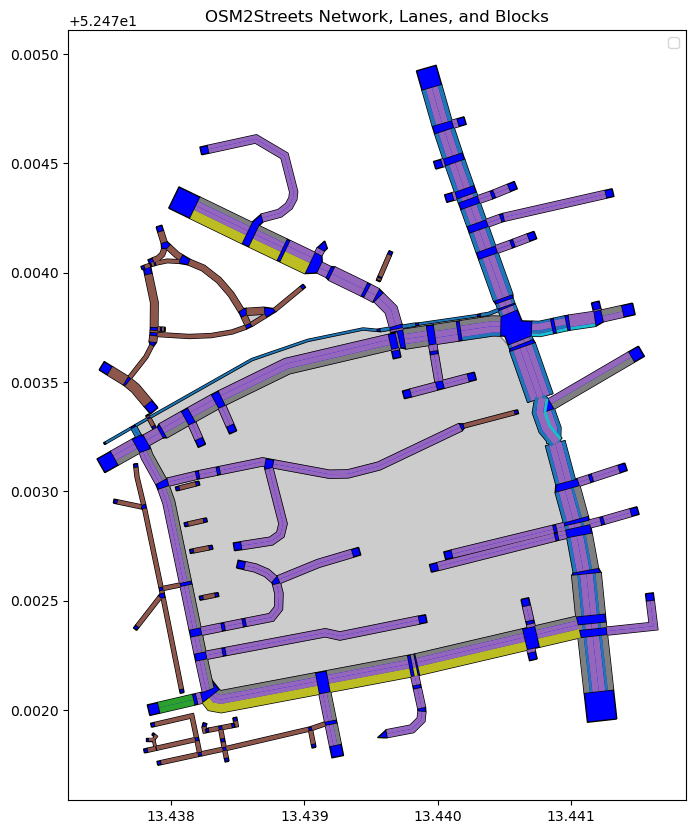

In [25]:
# Cell 1: Import necessary modules
import osm2streets_python
import geopandas as gpd
import json
import matplotlib.pyplot as plt

print("osm2streets_python imported successfully.")

# Cell 2: Load OSM XML data as bytes
osm_file_path = "../tests/src/neukolln/input.osm"
with open(osm_file_path, "rb") as file:
    osm_input = file.read()
print(f"Loaded {len(osm_input)} bytes from {osm_file_path}.")

# Load the GeoJSON boundary for clipping
with open("../tests/src/neukolln/boundary.json", "r") as f:
    clip_pts_geojson = json.load(f)

# Convert the JSON object to a string format for input
clip_pts_geojson = json.dumps(clip_pts_geojson)

# Cell 3: Define input options for PyStreetNetwork
input_options = {
    "debug_each_step": False,
    "dual_carriageway_experiment": False,
    "sidepath_zipping_experiment": False,
    "inferred_sidewalks": True,
    "inferred_kerbs": True,
    "date_time": None,
    "override_driving_side": "Right"
}
input_options_json = json.dumps(input_options)

# Cell 4: Initialize PyStreetNetwork
try:
    network = osm2streets_python.PyStreetNetwork(osm_input, clip_pts_geojson, input_options_json)
    print("PyStreetNetwork instance created successfully!")
except Exception as e:
    print(f"Error during initialization: {e}")

# Cell 5: Generate and visualize the outputs
# Function to load geojson output and convert to GeoDataFrame
def load_geojson_to_gdf(geojson_str, crs=4326):
    geojson_data = json.loads(geojson_str)
    return gpd.GeoDataFrame.from_features(geojson_data["features"], crs=crs)

# Generate main network output
try:
    geojson_output = network.to_geojson_plain()
    gdf = load_geojson_to_gdf(geojson_output)
    print("GeoJSON output successfully generated!")
except Exception as e:
    print(f"Error generating main network GeoJSON: {e}")

# Generate lane polygons output
try:
    geojson_lane_output = network.to_lane_polygons_geojson()
    gdf_lanes = load_geojson_to_gdf(geojson_lane_output)
    print("Lane GeoJSON output successfully generated!")
except Exception as e:
    print(f"Error generating lane polygons GeoJSON: {e}")

# Cell 6: Find all blocks using find_all_blocks function and visualize output

# Attempt to find all blocks using sidewalks as an option (set to True/False as needed)
try:
    # Call find_all_blocks with sidewalks=True to include sidewalks in the block generation
    blocks_json = network.find_all_blocks(sidewalks=False)
    print("Block data successfully generated!")

    # Parse the JSON output from find_all_blocks
    blocks_data = json.loads(blocks_json)

    # Convert the blocks data to a GeoDataFrame for visualization
    gdf_blocks = gpd.GeoDataFrame.from_features(blocks_data["features"], crs=4326)
    print("Block data loaded into GeoDataFrame!")
except Exception as e:
    print(f"Error finding or visualizing blocks: {e}")

# Cell 7: Visualize the outputs with Matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_blocks.plot(ax=ax, color='grey', edgecolor='black', alpha=0.4)
gdf.plot(ax=ax, color='blue', edgecolor='k', label='Network')
gdf_lanes.plot(ax=ax, column="type", label='Lanes')
plt.legend()
plt.title("OSM2Streets Network, Lanes, and Blocks")
plt.show()